In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Red Wine Quality Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

White Wine Quality Distribution:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


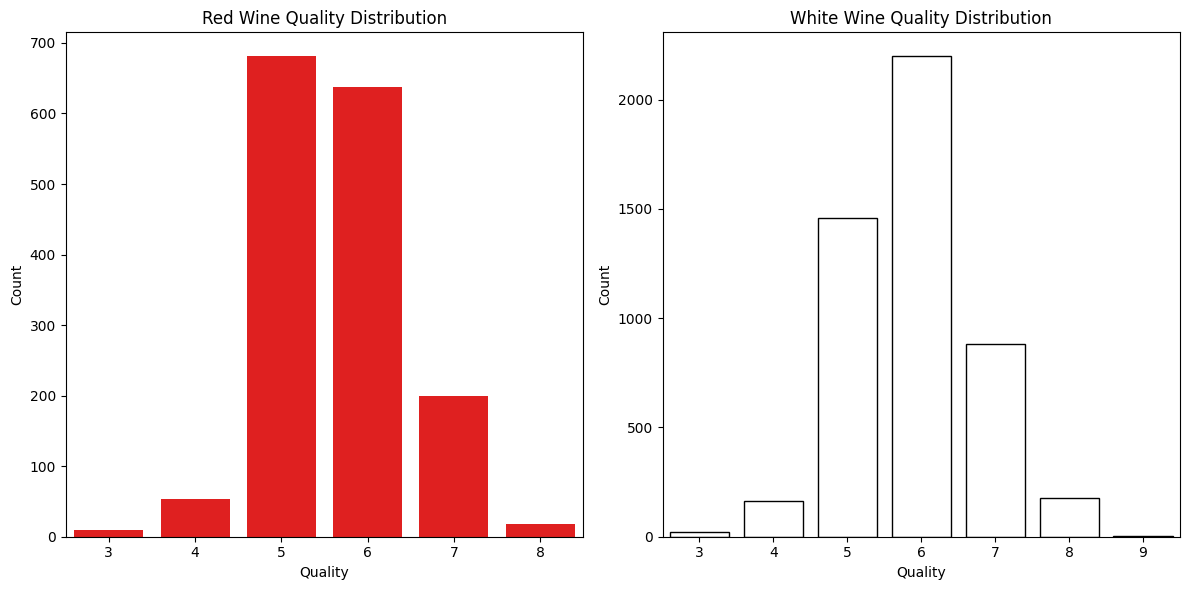

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
red_wine_df = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_df = pd.read_csv("winequality-white.csv", delimiter=";")

# Describe the distribution of wine quality for red wines
red_quality_distribution = red_wine_df['quality'].value_counts().sort_index()
print("Red Wine Quality Distribution:")
print(red_quality_distribution)

# Describe the distribution of wine quality for white wines
white_quality_distribution = white_wine_df['quality'].value_counts().sort_index()
print("\nWhite Wine Quality Distribution:")
print(white_quality_distribution)

# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=red_quality_distribution.index, y=red_quality_distribution.values, color='red')
plt.title('Red Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=white_quality_distribution.index, y=white_quality_distribution.values, color='white', edgecolor='black')
plt.title('White Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate mean and standard deviation of alcohol content for red and white wines
red_mean_alcohol = red_wine_df['alcohol'].mean()
red_std_alcohol = red_wine_df['alcohol'].std()

white_mean_alcohol = white_wine_df['alcohol'].mean()
white_std_alcohol = white_wine_df['alcohol'].std()

# Define thresholds for low, mid, and high categories
red_low_threshold = red_mean_alcohol - red_std_alcohol
red_high_threshold = red_mean_alcohol + red_std_alcohol

white_low_threshold = white_mean_alcohol - white_std_alcohol
white_high_threshold = white_mean_alcohol + white_std_alcohol

# Function to categorize alcohol content
def categorize_alcohol(alcohol, low_threshold, high_threshold):
    if alcohol < low_threshold:
        return 'low'
    elif low_threshold <= alcohol <= high_threshold:
        return 'mid'
    else:
        return 'high'

# Apply categorization to red wines
red_wine_df['alcohol_cat'] = red_wine_df['alcohol'].apply(
    lambda x: categorize_alcohol(x, red_low_threshold, red_high_threshold)
)

# Apply categorization to white wines
white_wine_df['alcohol_cat'] = white_wine_df['alcohol'].apply(
    lambda x: categorize_alcohol(x, white_low_threshold, white_high_threshold)
)

# Display the updated dataframes
print("Red Wine Data:")
print(red_wine_df.head())
print("\nWhite Wine Data:")
print(white_wine_df.head())


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality alcohol_cat  
0      9.4        5         mid  
1  

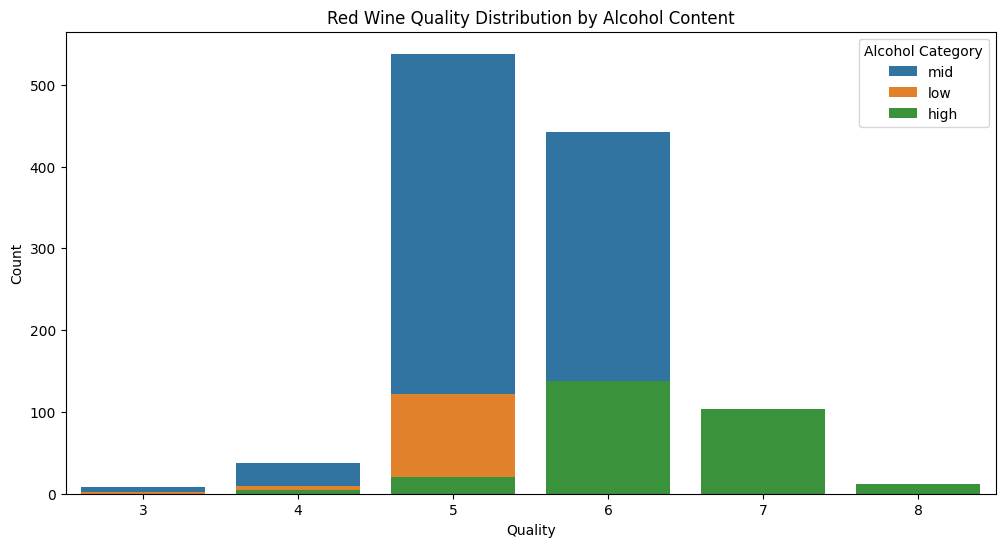

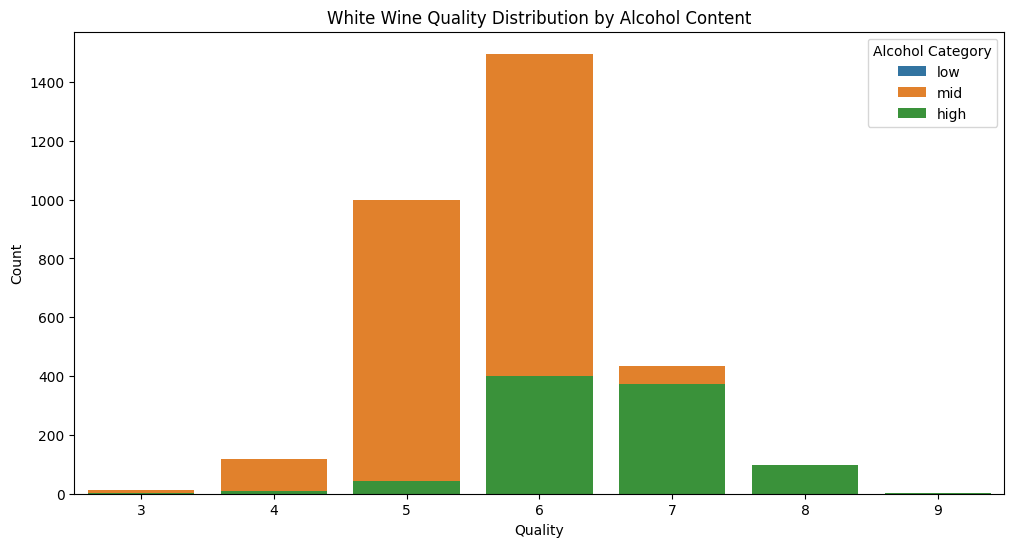

In [ ]:
def plot_quality_distribution(df, title):
    plt.figure(figsize=(12, 6))
    for cat in df['alcohol_cat'].unique():
        subset = df[df['alcohol_cat'] == cat]
        quality_distribution = subset['quality'].value_counts().sort_index()
        sns.barplot(x=quality_distribution.index, y=quality_distribution.values, label=cat)
    plt.title(title)
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.legend(title='Alcohol Category')
    plt.show()

# Plot quality distribution for red wines based on alcohol content categories
plot_quality_distribution(red_wine_df, 'Red Wine Quality Distribution by Alcohol Content')

# Plot quality distribution for white wines based on alcohol content categories
plot_quality_distribution(white_wine_df, 'White Wine Quality Distribution by Alcohol Content')

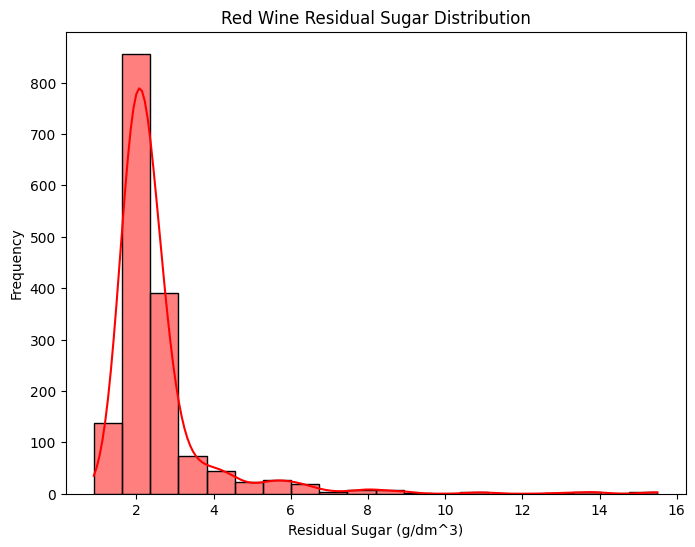

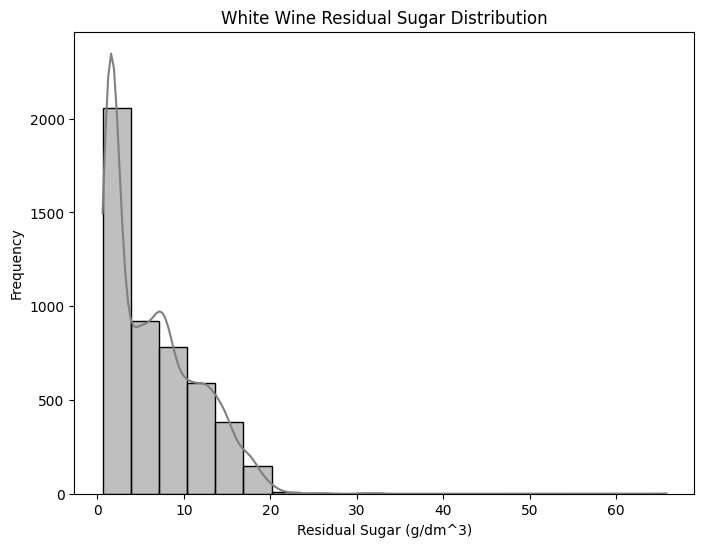

In [ ]:
# Plot the distribution of residual sugar for red wines
plt.figure(figsize=(8, 6))
sns.histplot(red_wine_df['residual sugar'], bins=20, kde=True, color='red')
plt.title('Red Wine Residual Sugar Distribution')
plt.xlabel('Residual Sugar (g/dm^3)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of residual sugar for white wines
plt.figure(figsize=(8, 6))
sns.histplot(white_wine_df['residual sugar'], bins=20, kde=True, color='grey')
plt.title('White Wine Residual Sugar Distribution')
plt.xlabel('Residual Sugar (g/dm^3)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Define threshold for sweetness
threshold = 5  # g/dm^3

# Function to categorize residual sugar into sweet or dry
def categorize_sweetness(sugar, threshold):
    if sugar > threshold:
        return 1  # sweet
    else:
        return 0  # dry

# Apply categorization to red wines
red_wine_df['isSweet'] = red_wine_df['residual sugar'].apply(lambda x: categorize_sweetness(x, threshold))

# Apply categorization to white wines
white_wine_df['isSweet'] = white_wine_df['residual sugar'].apply(lambda x: categorize_sweetness(x, threshold))

# Display the updated dataframes
print("Red Wine Data:")
print(red_wine_df.head())
print("\nWhite Wine Data:")
print(white_wine_df.head())


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality alcohol_cat  isSweet  
0      9.4        5         

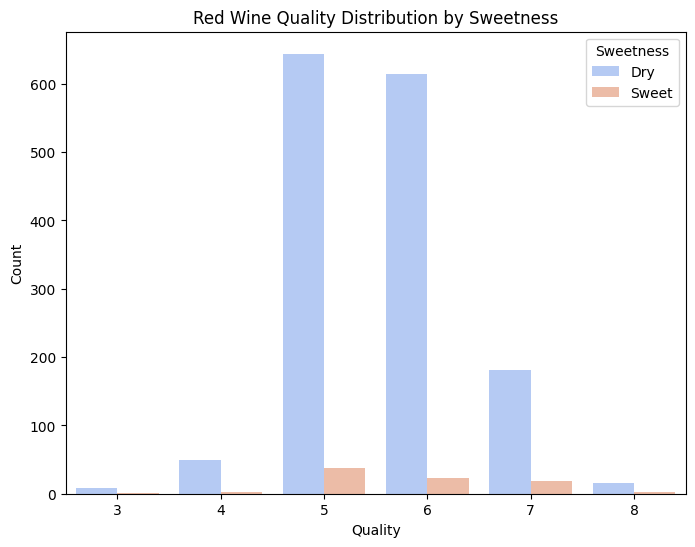

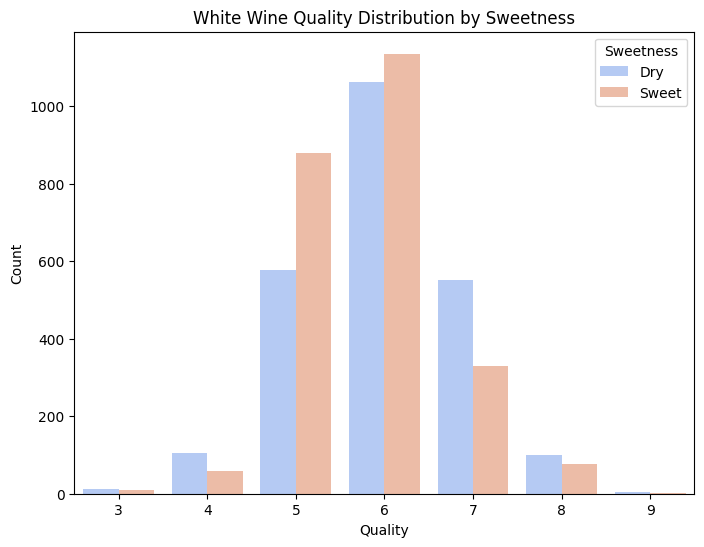

In [ ]:
# Function to plot quality distribution for sweet and dry wines
def plot_quality_vs_sweetness(df, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='quality', hue='isSweet', data=df, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.legend(title='Sweetness', labels=['Dry', 'Sweet'])
    plt.show()

# Plot quality distribution for red wines based on sweetness
plot_quality_vs_sweetness(red_wine_df, 'Red Wine Quality Distribution by Sweetness')

# Plot quality distribution for white wines based on sweetness
plot_quality_vs_sweetness(white_wine_df, 'White Wine Quality Distribution by Sweetness')


**Using the previous threshold, repeat the distribution analysis of quality vs isSweet. (are sweet wines perceived as lower or higher quality than dry wines?)**

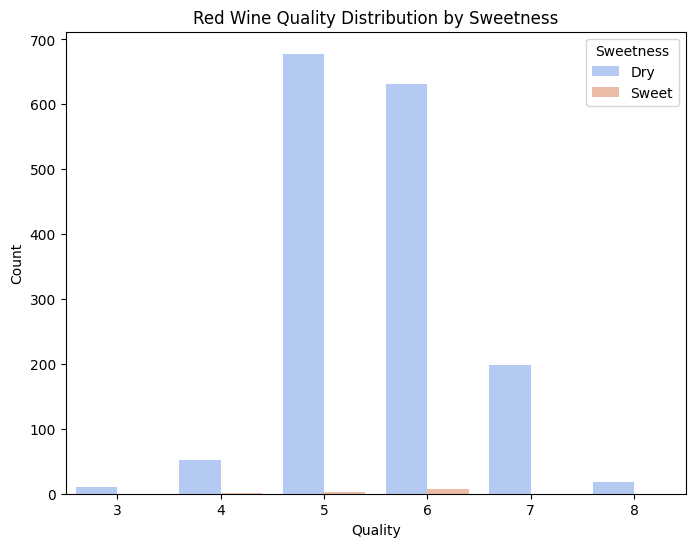

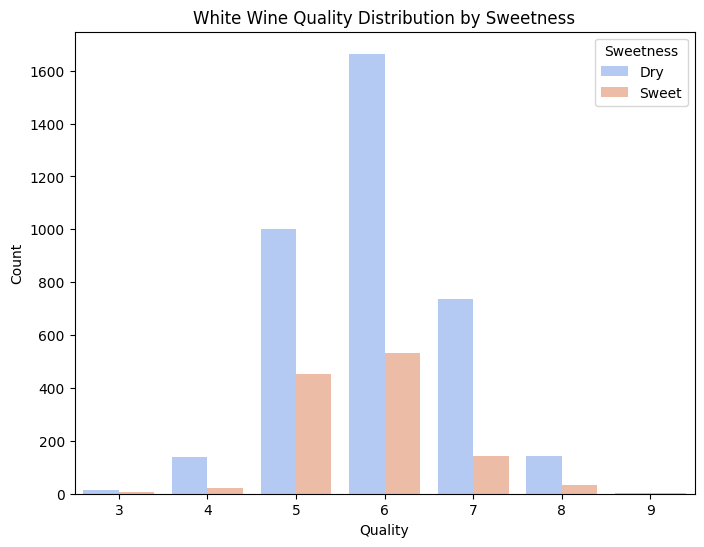

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load red wine dataset
red_wine_df = pd.read_csv('winequality-red.csv', sep=';')

# Load white wine dataset
white_wine_df = pd.read_csv('winequality-white.csv', sep=';')

# Define the threshold for sweetness
sweetness_threshold = 10  # g/dm^3

# Create a new binary variable 'isSweet' based on the threshold
red_wine_df['isSweet'] = red_wine_df['residual sugar'].apply(lambda x: 1 if x > sweetness_threshold else 0)
white_wine_df['isSweet'] = white_wine_df['residual sugar'].apply(lambda x: 1 if x > sweetness_threshold else 0)

# Function to plot quality distribution for sweet and dry wines
def plot_quality_vs_sweetness(df, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='quality', hue='isSweet', data=df, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.legend(title='Sweetness', labels=['Dry', 'Sweet'])
    plt.show()

# Plot quality distribution for red wines based on sweetness
plot_quality_vs_sweetness(red_wine_df, 'Red Wine Quality Distribution by Sweetness')

# Plot quality distribution for white wines based on sweetness
plot_quality_vs_sweetness(white_wine_df, 'White Wine Quality Distribution by Sweetness')


**2. In preparation to applying machine learning to create your model, try and determine which subset of your variables can be most useful for learning. To do this, analyse correlations between:**

each pair of variables

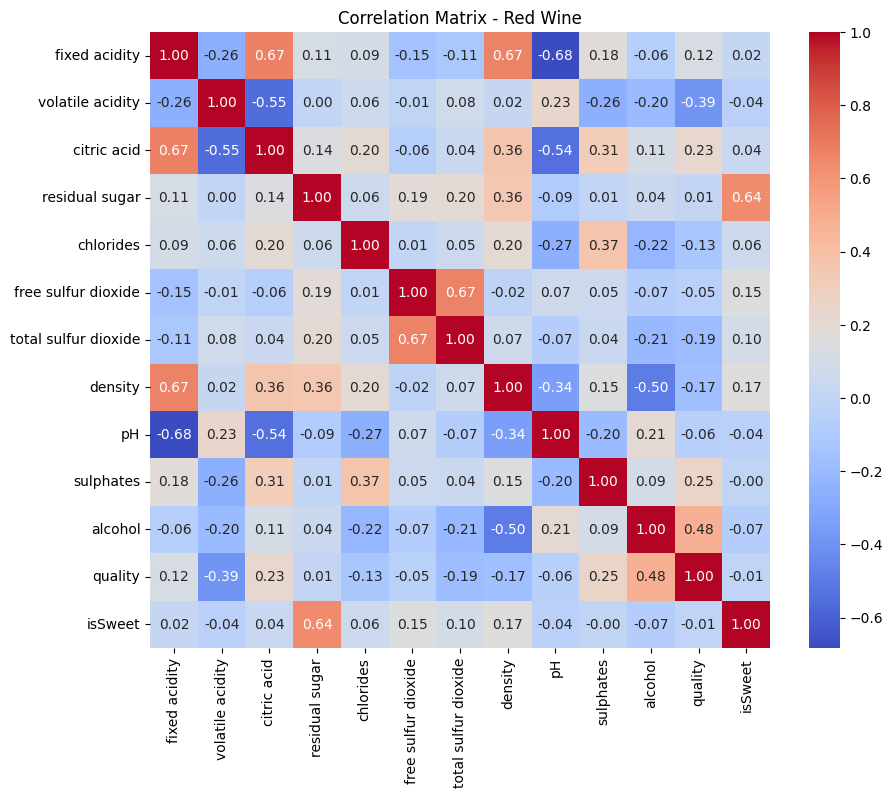

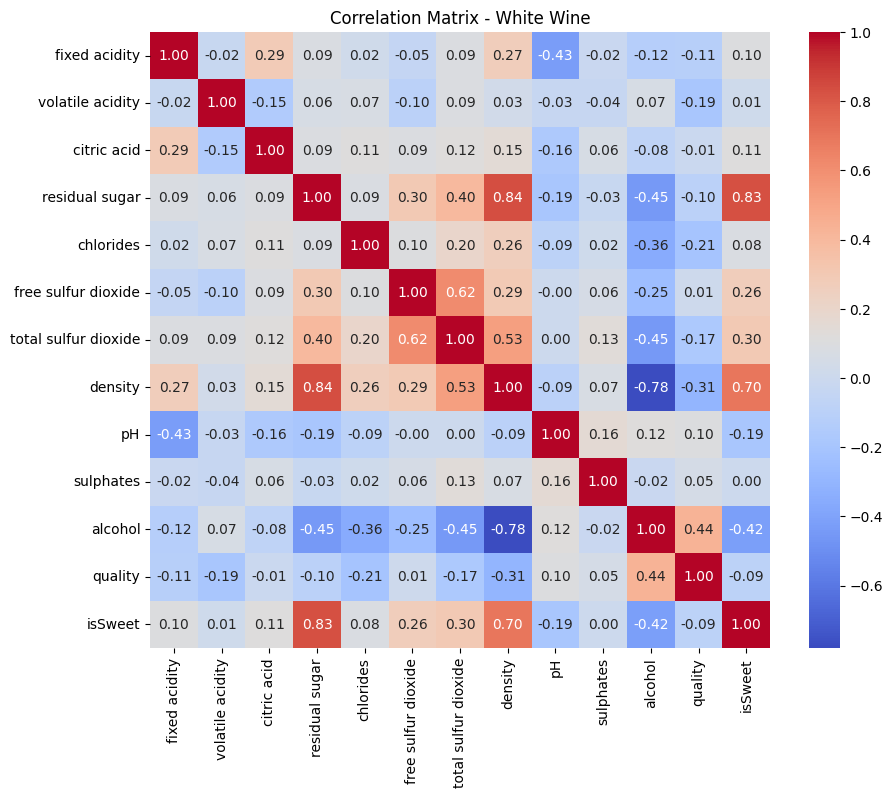

In [6]:
# Calculate the correlation matrix for red wine
red_corr_matrix = red_wine_df.corr()

# Plot the correlation matrix for red wine
plt.figure(figsize=(10, 8))
sns.heatmap(red_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Red Wine')
plt.show()

# Calculate the correlation matrix for white wine
white_corr_matrix = white_wine_df.corr()

# Plot the correlation matrix for white wine
plt.figure(figsize=(10, 8))
sns.heatmap(white_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - White Wine')
plt.show()


each variable and the outcome (quality)

In [7]:
# Calculate the correlation coefficients between each predictor variable and quality for red wine
red_corr_quality = red_wine_df.corr()['quality'].drop('quality')

# Calculate the correlation coefficients between each predictor variable and quality for white wine
white_corr_quality = white_wine_df.corr()['quality'].drop('quality')

# Display correlation coefficients for red wine
print("Correlation coefficients between predictor variables and quality for red wine:")
print(red_corr_quality)

# Display correlation coefficients for white wine
print("\nCorrelation coefficients between predictor variables and quality for white wine:")
print(white_corr_quality)


Correlation coefficients between predictor variables and quality for red wine:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
isSweet                -0.009337
Name: quality, dtype: float64

Correlation coefficients between predictor variables and quality for white wine:
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
isSweet                -0.086663
Name: quality, dt

produce a visual representation of the Correlation Matrix, using either seaborn (Links to an external site.) or matplotlib (Links to an external site.). Comment on how some of the variables may relate to others. For this task, you may use  Pandas methods to automatically create correlation matrices, for example pandas.DataFrame.corr().   (Links to an external site.)Take care of using the correct metrics, i.e. you must choose between {‘pearson’, ‘kendall’, ‘spearman’}. Consult the documentation to learn about these metrics.

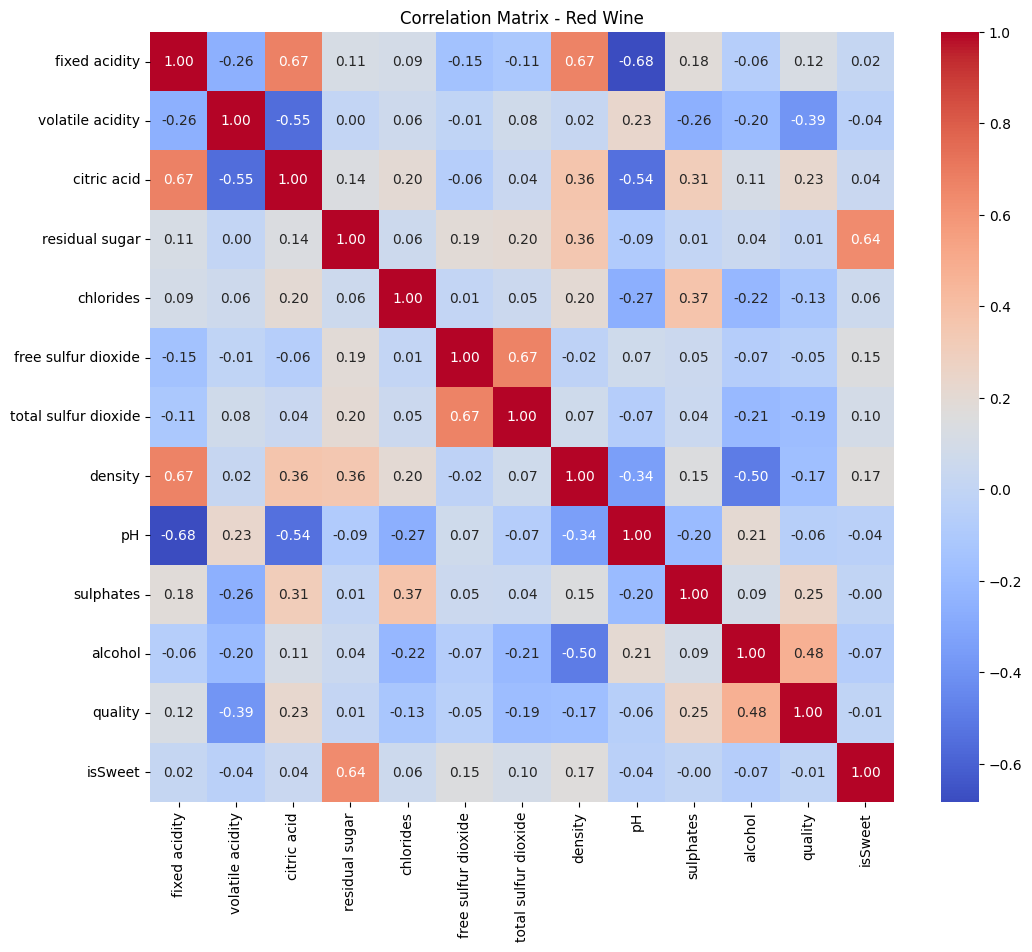

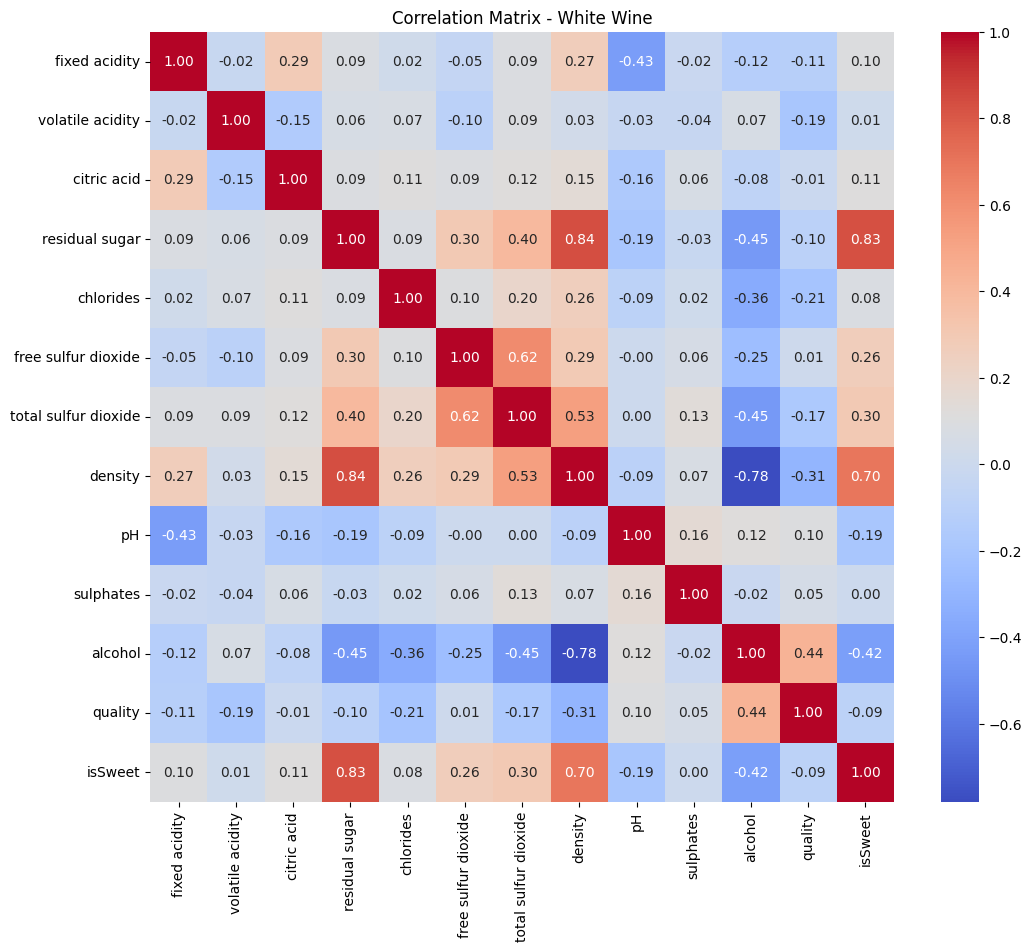

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for red wine using Pearson correlation coefficient
red_corr_matrix = red_wine_df.corr(method='pearson')

# Plot the correlation matrix for red wine
plt.figure(figsize=(12, 10))
sns.heatmap(red_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Red Wine')
plt.show()

# Calculate the correlation matrix for white wine using Pearson correlation coefficient
white_corr_matrix = white_wine_df.corr(method='pearson')

# Plot the correlation matrix for white wine
plt.figure(figsize=(12, 10))
sns.heatmap(white_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - White Wine')
plt.show()


Experiment with one or more machine learning approaches to create a predictive model for quality.

Consider this as a classification problem. You can do this by considering the quality labels, ie. '5', '6', ... '9' and reducing the number of possible labels to 2 (binary classification). You should experiment with different thresholds and compare results, for instance define "low" to be quality <6, "high" >=6, then change the threshold to 5 or 7, etc.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define function to convert quality labels into binary labels based on threshold
def convert_to_binary_labels(df, threshold):
    df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= threshold else 0)
    return df

# Define function to train and evaluate model
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Initialize and train the random forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

# Define threshold values to experiment with
threshold_values = [5, 6, 7]

# Iterate over each threshold value
for threshold in threshold_values:
    print(f"Threshold: {threshold}")
    # Convert quality labels to binary labels based on the threshold
    red_wine_df = convert_to_binary_labels(red_wine_df, threshold)
    white_wine_df = convert_to_binary_labels(white_wine_df, threshold)

    # Select predictor variables (X) and target variable (y)
    X_red = red_wine_df.drop(['quality', 'quality_binary'], axis=1)
    y_red = red_wine_df['quality_binary']

    X_white = white_wine_df.drop(['quality', 'quality_binary'], axis=1)
    y_white = white_wine_df['quality_binary']

    # Split the data into training and testing sets
    X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
    X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

    # Train and evaluate model for red wine
    red_accuracy, red_report = train_and_evaluate_model(X_train_red, y_train_red, X_test_red, y_test_red)
    print("Red Wine:")
    print(f"Accuracy: {red_accuracy:.4f}")
    print("Classification Report:")
    print(red_report)

    # Train and evaluate model for white wine
    white_accuracy, white_report = train_and_evaluate_model(X_train_white, y_train_white, X_test_white, y_test_white)
    print("White Wine:")
    print(f"Accuracy: {white_accuracy:.4f}")
    print("Classification Report:")
    print(white_report)

    print("="*50)


Threshold: 5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Red Wine:
Accuracy: 0.9656
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.97      0.95       320

White Wine:
Accuracy: 0.9745
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.23      0.36        30
           1       0.98      1.00      0.99       950

    accuracy                           0.97       980
   macro avg       0.88      0.62      0.67       980
weighted avg       0.97      0.97      0.97       980

Threshold: 6
Red Wine:
Accuracy: 0.7719
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       141
           1       0.80      0.79      0.79       179

    accuracy     

Consider this a regression problem, where quality is now a continuous variable.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define function to train and evaluate regression model
def train_and_evaluate_regression_model(X_train, y_train, X_test, y_test, model):
    # Train the regression model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return mse, mae, y_pred

# Select predictor variables (X) and target variable (y) for regression
X_red = red_wine_df.drop(['quality'], axis=1)
y_red = red_wine_df['quality']

X_white = white_wine_df.drop(['quality'], axis=1)
y_white = white_wine_df['quality']

# Split the data into training and testing sets for red wine
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Split the data into training and testing sets for white wine
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Initialize regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)

# Train and evaluate regression models for red wine
print("Red Wine:")
for model in [linear_reg, decision_tree_reg, random_forest_reg]:
    mse_red, mae_red, y_pred_red = train_and_evaluate_regression_model(X_train_red, y_train_red, X_test_red, y_test_red, model)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse_red:.4f}")
    print(f"Mean Absolute Error: {mae_red:.4f}")
    print("="*30)

# Train and evaluate regression models for white wine
print("White Wine:")
for model in [linear_reg, decision_tree_reg, random_forest_reg]:
    mse_white, mae_white, y_pred_white = train_and_evaluate_regression_model(X_train_white, y_train_white, X_test_white, y_test_white, model)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse_white:.4f}")
    print(f"Mean Absolute Error: {mae_white:.4f}")
    print("="*30)


Red Wine:
Model: LinearRegression
Mean Squared Error: 0.2413
Mean Absolute Error: 0.4025
Model: DecisionTreeRegressor
Mean Squared Error: 0.4656
Mean Absolute Error: 0.3656
Model: RandomForestRegressor
Mean Squared Error: 0.2174
Mean Absolute Error: 0.3439
White Wine:
Model: LinearRegression
Mean Squared Error: 0.2736
Mean Absolute Error: 0.4240
Model: DecisionTreeRegressor
Mean Squared Error: 0.3837
Mean Absolute Error: 0.3143
Model: RandomForestRegressor
Mean Squared Error: 0.1918
Mean Absolute Error: 0.3152


Evaluate each model using k-fold cross validation (Links to an external site.) and report the model's performance (1) on the training set, (2) on the test set, using appropriate metrics for the kind of model chosen. For example, a binary classifier can be evaluated using f1-score (Links to an external site.), ROC curves (Links to an external site.), AUC (Links to an external site.). A regression model is usually evaluated using MSE (Links to an external site.), RMSE and related "error" metrics (Links to an external site.).

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define scoring functions for classification and regression models
f1_scorer = make_scorer(f1_score, average='weighted')
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Define function to perform k-fold cross-validation and report performance
def evaluate_model(model, X, y, cv, scoring):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores.mean(), scores.std()

# Initialize models
models = {
    'Linear Regression': linear_reg,
    'Decision Tree Regression': decision_tree_reg,
    'Random Forest Regression': random_forest_reg
}

# Define k-fold cross-validation settings
cv = 5  # Number of folds

# Evaluate models for red wine dataset
print("Red Wine:")
for name, model in models.items():
    print(f"Model: {name}")
    mse_mean, mse_std = evaluate_model(model, X_red, y_red, cv, mse_scorer)
    mae_mean, mae_std = evaluate_model(model, X_red, y_red, cv, mae_scorer)
    r2_mean, r2_std = evaluate_model(model, X_red, y_red, cv, r2_scorer)
    print(f"MSE (Mean ± Std): {mse_mean:.4f} ± {mse_std:.4f}")
    print(f"MAE (Mean ± Std): {mae_mean:.4f} ± {mae_std:.4f}")
    print(f"R-squared (Mean ± Std): {r2_mean:.4f} ± {r2_std:.4f}")
    print("="*40)

# Evaluate models for white wine dataset
print("\nWhite Wine:")
for name, model in models.items():
    print(f"Model: {name}")
    mse_mean, mse_std = evaluate_model(model, X_white, y_white, cv, mse_scorer)
    mae_mean, mae_std = evaluate_model(model, X_white, y_white, cv, mae_scorer)
    r2_mean, r2_std = evaluate_model(model, X_white, y_white, cv, r2_scorer)
    print(f"MSE (Mean ± Std): {mse_mean:.4f} ± {mse_std:.4f}")
    print(f"MAE (Mean ± Std): {mae_mean:.4f} ± {mae_std:.4f}")
    print(f"R-squared (Mean ± Std): {r2_mean:.4f} ± {r2_std:.4f}")
    print("="*40)


Red Wine:
Model: Linear Regression
MSE (Mean ± Std): 0.2726 ± 0.0341
MAE (Mean ± Std): 0.4181 ± 0.0253
R-squared (Mean ± Std): 0.5558 ± 0.0791
Model: Decision Tree Regression
MSE (Mean ± Std): 0.5353 ± 0.0355
MAE (Mean ± Std): 0.4465 ± 0.0202
R-squared (Mean ± Std): 0.1337 ± 0.0703
Model: Random Forest Regression
MSE (Mean ± Std): 0.2793 ± 0.0235
MAE (Mean ± Std): 0.4063 ± 0.0199
R-squared (Mean ± Std): 0.5454 ± 0.0663

White Wine:
Model: Linear Regression
MSE (Mean ± Std): 0.2786 ± 0.0352
MAE (Mean ± Std): 0.4298 ± 0.0238
R-squared (Mean ± Std): 0.6405 ± 0.0215
Model: Decision Tree Regression
MSE (Mean ± Std): 0.5269 ± 0.0534
MAE (Mean ± Std): 0.4416 ± 0.0320
R-squared (Mean ± Std): 0.3190 ± 0.0299
Model: Random Forest Regression
MSE (Mean ± Std): 0.2737 ± 0.0441
MAE (Mean ± Std): 0.4117 ± 0.0366
R-squared (Mean ± Std): 0.6489 ± 0.0219
